# Module 1 Code Challenge

This code challenge is designed to test your understanding of the Module 1 material. It covers:

- Pandas
- Data Visualization
- Exploring Statistical Data
- Python Data Structures

_Read the instructions carefully._ You will be asked both to write code and to respond to a few short answer questions.

### Note on the short answer questions

For the short answer questions _please use your own words_. The expectation is that you have **not** copied and pasted from an external source, even if you consult another source to help craft your response. While the short answer questions are not necessarily being assessed on grammatical correctness or sentence structure, you should do your best to communicate yourself clearly.

---
## Part 1: Pandas [Suggested Time: 15 minutes]
---

In this section you will be doing some preprocessing for a dataset for the videogame [FIFA19](https://www.kaggle.com/karangadiya/fifa19). The dataset contains both data for the game as well as information about the players' real life careers.

In [1]:
# Run this cell without changes

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### 1.1) Read the CSV file into a pandas DataFrame

The data you'll be working with is in a file called `'./data/fifa.csv'`. Use your knowledge of pandas to create a new DataFrame, called `df`, using the data from this CSV file. 

Check the contents of the first few rows of your DataFrame, then show the size of the DataFrame. 

In [46]:
# Replace None with appropriate code
df = pd.read_csv('./data/fifa.csv')

In [5]:
# Code here to check the first few rows of the DataFrame
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500.0
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100.0
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100.0
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600.0
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400.0


In [19]:
# Code here to see the size of the DataFrame
df.shape

(18207, 88)

### 1.2) Drop rows with missing values for `'Release Clause'`
    
Drop rows for which "Release Clause" is none or not given. This is part of a soccer player's contract dealing with being bought out by another team. After you have dropped them, see how many rows are remaining.

In [47]:
# Code here to drop rows with missing values for 'Release Clause'
df['Release Clause'].isna().sum()
df = df.dropna(subset = ['Release Clause'])

In [23]:
# Code here to check how many rows are left 
df.shape

(16643, 88)

### 1.3) Convert the `'Release Clause'` Price from Euros to Dollars

Now that there are no missing values, we can change the values in the `'Release Clause'` column from Euro to Dollar amounts.

Assume the current exchange rate is `1 Euro = 1.2 Dollars`

In [48]:
# Code here to convert the column of euros to dollars
df['Release Clause'].head() #Checking values before

#df['Release Clause2'] = df['Release Clause'] *(1.2) ##Creating a new column to check for accuracy
#df[['Release Clause', 'Release Clause2']].head() # Checking Values after

df['Release Clause'] = df['Release Clause'] * (1.2) ##Solution
df['Release Clause'].head()


0    271800.0
1    152520.0
2    273720.0
3    166320.0
4    235680.0
Name: Release Clause, dtype: float64

---
## Part 2: Data Visualization [Suggested Time: 20 minutes]
---

Continuing to use the same FIFA dataset, plot data using whichever plotting library you are most comfortable with.

In [38]:
# Run this cell without changes

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2.1) Find the top 10 countries with the most players (using the `'Nationality'` column). Create a bar chart showing the number of players from those 10 countries.

Don't forget to add a **title** and **x axis label** to your charts.

If you are unable to find the top 10 countries but want the chance to demonstrate your plotting skills use the following dummy data to create a bar chart: 

```
Country Name  | Num Players
============  | ===========
Country A     | 100
Country B     | 60
Country C     | 125
Country D     | 89
```

In [74]:
# Code here to get the top 10 countries with the most players
df.columns
countries = df.groupby(df['Nationality']).count() #grouping by country and counting rows

countries.sort_values('ID', ascending = False, inplace = True) #sorting in descending order
countries[0:10] #printing first 10 rows


,ID,Name,Age,Photo,Flag,Overall,Potential,Club,Club Logo,Value,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
Nationality,,,,,,,,,,,,,,,,,,,,,
England,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475,...,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475
Germany,1151,1151,1151,1151,1151,1151,1151,1151,1151,1151,...,1151,1151,1151,1151,1151,1151,1151,1151,1151,1151
Spain,974,974,974,974,974,974,974,974,974,974,...,974,974,974,974,974,974,974,974,974,974
France,853,853,853,853,853,853,853,853,853,853,...,853,853,853,853,853,853,853,853,853,853
Argentina,833,833,833,833,833,833,833,833,833,833,...,833,833,833,833,833,833,833,833,833,833
Brazil,788,788,788,788,788,788,788,788,788,788,...,788,788,788,788,788,788,788,788,788,788
Italy,579,579,579,579,579,579,579,579,579,579,...,579,579,579,579,579,579,579,579,579,579
Colombia,570,570,570,570,570,570,570,570,570,570,...,570,570,570,570,570,570,570,570,570,570
Japan,455,455,455,455,455,455,455,455,455,455,...,455,455,455,455,455,455,455,455,455,455


<BarContainer object of 10 artists>

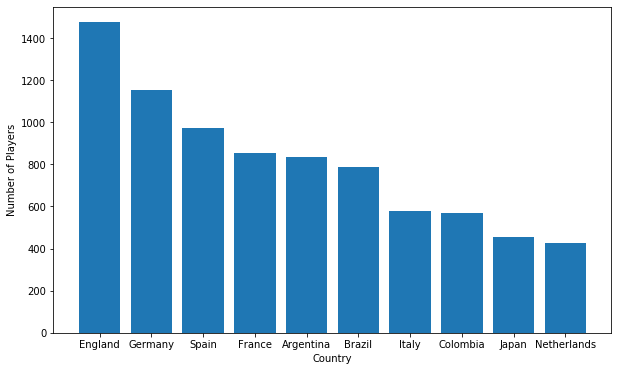

In [86]:
# Code here to plot a bar chart.  A recommended figsize is (10, 6)
countries10 = countries[0:10] 
countries10
xvalues = countries10.index
yvalues = countries10['ID']
plt.figure(figsize = (10,6))
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.bar(xvalues,yvalues)

### 2.2) Describe the relationship between `StandingTackle` and `SlidingTackle`, as shown in the scatter plot produced below.

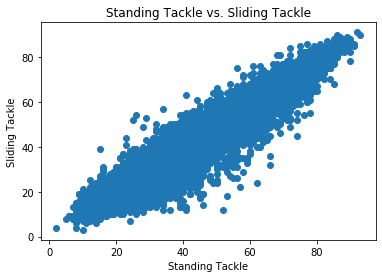

In [87]:
# Run this cell without changes

fig, ax = plt.subplots()

ax.set_title('Standing Tackle vs. Sliding Tackle')
ax.set_xlabel('Standing Tackle')
ax.set_ylabel('Sliding Tackle')

x = df['StandingTackle']
y = df['SlidingTackle']

ax.scatter(x, y)

Please describe in words the relationship between these two features.

In [89]:
df['SlidingTackle'].corr(df['StandingTackle'])
#There is a strong positive corrleation (.974) between the number of sliding 
#and standing tackles. Generally the number of sliding tackles a player performs is going
#to be very similar to the number of standing tackles they perform.



0.9747128096533418

---
## Part 3: Exploring Statistical Data [Suggested Time: 20 minutes]
---

### 3.1) What are the mean age and the median age for the players in this dataset?

In [108]:
df['Age'] = df['Age'].astype(int)
print(df['Age'].mean(), df['Age'].median())

25.226221234152497 25.0


In your own words, how are the mean and median related to each other and what do these values tell us about the distribution of the column `'Age'`? 

In [ ]:
#The mean of a data set is the equal weighted average of the values where as the median is
# the center value if you had the values sorted in order. Medians are significantly more
#resistant to outlier or non-normal distributions. In this case since the mean and median
#are very similar I would expect that we have a relatively normal distribution of ages within
#a confined range as well as no significant outliers or at least a very low number of them

### 3.2) Who is the oldest player from Argentina and how old is he?
Use the `Nationality` column.

In [270]:
# Code here to find the oldest player in Argentina
df_argentina = df.loc[df['Nationality']=='Argentina'] #create new dataframe with just argeninta
df_argentina.sort_values('Age', ascending=False,inplace =True)
names = list(df_argentina['Name'])
ages = list(df_argentina['Age'])
print(names[0], ages[0])

C. Muñoz 41


In [271]:
#The oldest player from Argentina is C. Muñoz at 41

---
## Part 4: Python Data Structures [Suggested Time: 20 min]
---

In this final section, we will work with various Python data types and try to accomplish certain tasks using some fundamental data structures in Python, rather than using Pandas DataFrames. Below, we've defined a dictionary with soccer player names as keys for nested dictionaries containing information about each player's age, nationality, and a list of teams they have played for.

In [272]:
# Run this cell without changes

players = {
    'L. Messi': {
        'age': 31,
        'nationality': 'Argentina',
        'teams': ['Barcelona']
    },
    'Cristiano Ronaldo': {
        'age': 33,
        'nationality': 'Portugal',
        'teams': ['Juventus', 'Real Madrid', 'Manchester United']
    },
    'Neymar Jr': {
        'age': 26,
        'nationality': 'Brazil',
        'teams': ['Santos', 'Barcelona', 'Paris Saint-German']
    },
    'De Gea': {
        'age': 27,
        'nationality': 'Spain',
        'teams': ['Atletico Madrid', 'Manchester United']
    },
    'K. De Bruyne': {
        'age': 27,
        'nationality': 'Belgium',
        'teams': ['Chelsea', 'Manchester City']
    }
}

### 4.1) Create a `list` of all the keys in the `players` dictionary. Store the list of player names in a variable called `player_names` to use in the next question.

Use [Python's documentation on dictionaries](https://docs.python.org/3/tutorial/datastructures.html#dictionaries) for help if needed. 

In [273]:
# Replace None with appropriate code to get the list of all player names

player_names = list(players.keys())
player_names

['L. Messi', 'Cristiano Ronaldo', 'Neymar Jr', 'De Gea', 'K. De Bruyne']

In [274]:
# Run this cell without changes to check your answer

print(player_names)

['L. Messi', 'Cristiano Ronaldo', 'Neymar Jr', 'De Gea', 'K. De Bruyne']


### 4.2) Great! Now that we have the names of all players, let's use that information to create a `list` of `tuples` containing each player's name along with their nationality. Store the list in a variable called `player_nationalities`.

In [275]:
players[player_names[0]]['age']

31

In [276]:
# Replace None with appropriate code to generate list of tuples such that 
# the first element is a players name and the second is their nationality 
# Ex: [('L. Messi', 'Argentina'), ('Christiano Ronaldo', 'Portugal'), ...]

player_nationalities = ()
ages = []
for player in player_names:    #loop through each player
    ages.append(players[player]['age']) #add each player's age to list
player_nationalities  = tuple(zip(player_names,ages)) #merge into a tuple


In [286]:
# Run this cell without changes to check your answer

print(player_nationalities)

(('L. Messi', 31), ('Cristiano Ronaldo', 33), ('Neymar Jr', 26), ('De Gea', 27), ('K. De Bruyne', 27))


### 4.3) Define a function called `get_players_on_team()` that returns a `list` of the names of all the players who have played on a given team.

Your function should take two arguments: 

- a dictionary of player information
- the team name (as a `string`) you are trying to find the players for 

**Be sure that your function has a `return` statement.**

In [288]:
# Code here to define your get_players_on_team() function 
def get_players_on_team(player_input,name):
    team_players = []
    for player in player_input: #loop through the players
        for team in player_input[player]['teams']: #loop through each team within 'teams' within player
            if team == name:
                team_players.append(player) #add player name to list
    return(team_players)
                
        

In [291]:
# Run this cell without changes to check your answer

players_on_manchester_united = get_players_on_team(players, 'Manchester United')
print(players_on_manchester_united)

['Cristiano Ronaldo', 'De Gea']
